In [109]:
data<-read.csv("insurance.csv")
glimpse(data)

Rows: 1,338
Columns: 7
$ age      <int> 19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 1~
$ sex      <fct> female, male, male, male, male, female, female, female, male,~
$ bmi      <dbl> 27.900, 33.770, 33.000, 22.705, 28.880, 25.740, 33.440, 27.74~
$ children <int> 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0~
$ smoker   <fct> yes, no, no, no, no, no, no, no, no, no, no, yes, no, no, yes~
$ region   <fct> southwest, southeast, southeast, northwest, northwest, southe~
$ charges  <dbl> 16884.924, 1725.552, 4449.462, 21984.471, 3866.855, 3756.622,~


In [110]:
sapply(data,function(x){sum(is.na(x))})

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

In [111]:
data$sex <- ifelse(data$sex == "female", '0', '1')

In [115]:
library(mltools)
library(data.table)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [116]:
newdf <- one_hot(as.data.table(data))

In [117]:
newdf

age,sex,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
19,0,27.900,0,0,1,0,0,0,1,16884.924
18,1,33.770,1,1,0,0,0,1,0,1725.552
28,1,33.000,3,1,0,0,0,1,0,4449.462
33,1,22.705,0,1,0,0,1,0,0,21984.471
32,1,28.880,0,1,0,0,1,0,0,3866.855
31,0,25.740,0,1,0,0,0,1,0,3756.622
46,0,33.440,1,1,0,0,0,1,0,8240.590
37,0,27.740,3,1,0,0,1,0,0,7281.506
37,1,29.830,2,1,0,1,0,0,0,6406.411
60,0,25.840,0,1,0,0,1,0,0,28923.137


In [121]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [122]:
train_control <- trainControl(method = "repeatedcv", number=10,repeats=25)

In [123]:
split <- sample(nrow(newdf),nrow(newdf)*.9)

In [124]:
train <- newdf[split,]
test <- newdf[-split,]

In [125]:
model <- train(charges~. , data=train,method='lm',trControl=train_control)

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat

In [126]:
print(model)

Linear Regression 

1204 samples
  10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 25 times) 
Summary of sample sizes: 1083, 1083, 1084, 1083, 1084, 1084, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6131.622  0.7454835  4240.206

Tuning parameter 'intercept' was held constant at a value of TRUE


In [127]:
head(test)

age,sex,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
33,1,22.705,0,1,0,0,1,0,0,21984.471
37,0,27.740,3,1,0,0,1,0,0,7281.506
37,1,29.830,2,1,0,1,0,0,0,6406.411
62,0,26.290,0,0,1,0,0,1,0,27808.725
56,0,39.820,0,1,0,0,0,1,0,11090.718
19,1,24.600,1,1,0,0,0,0,1,1837.237


In [128]:
testx = test[,c(1,2,3,4,5,6,7,8,9,10)]
testy = test[,c(11)]

In [129]:
x_var = data.frame(testx)
y_var = data.frame(testy)


In [130]:
pred <- predict(model,x_var)

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

In [132]:
result <-data.frame(pred, y_var)

In [133]:
result

pred,charges
3575.5940,21984.471
7931.1916,7281.506
8461.5596,6406.411
36220.1767,27808.725
15227.1974,11090.718
535.3114,1837.237
7300.5633,6203.902
8262.3800,6313.759
4878.6828,2211.131
9017.5541,8059.679


In [141]:
lr_model = lm(charges~., data=train)

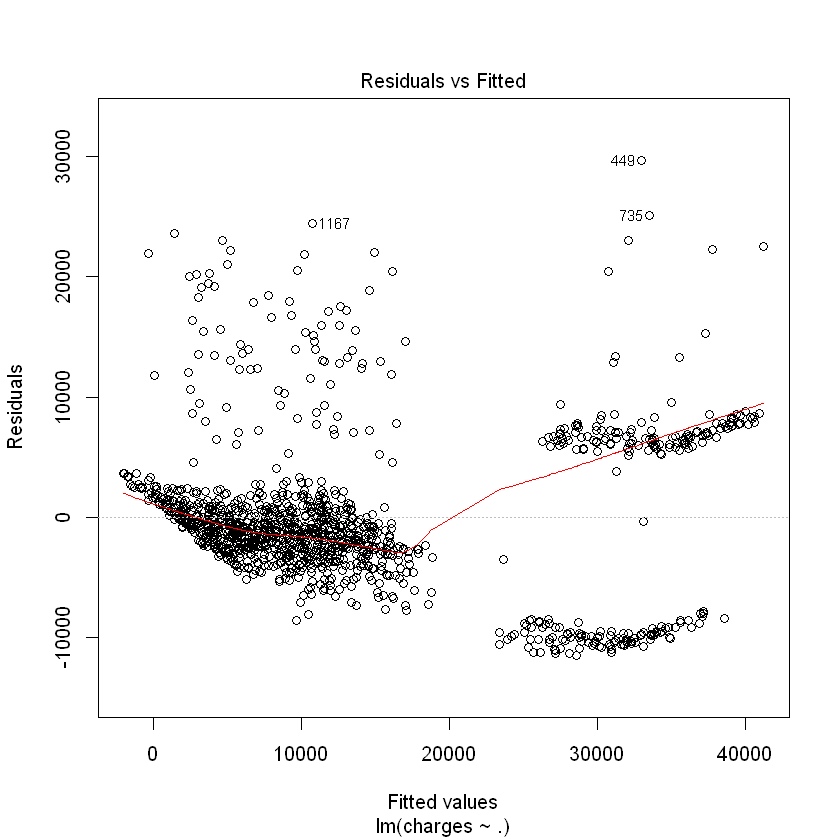

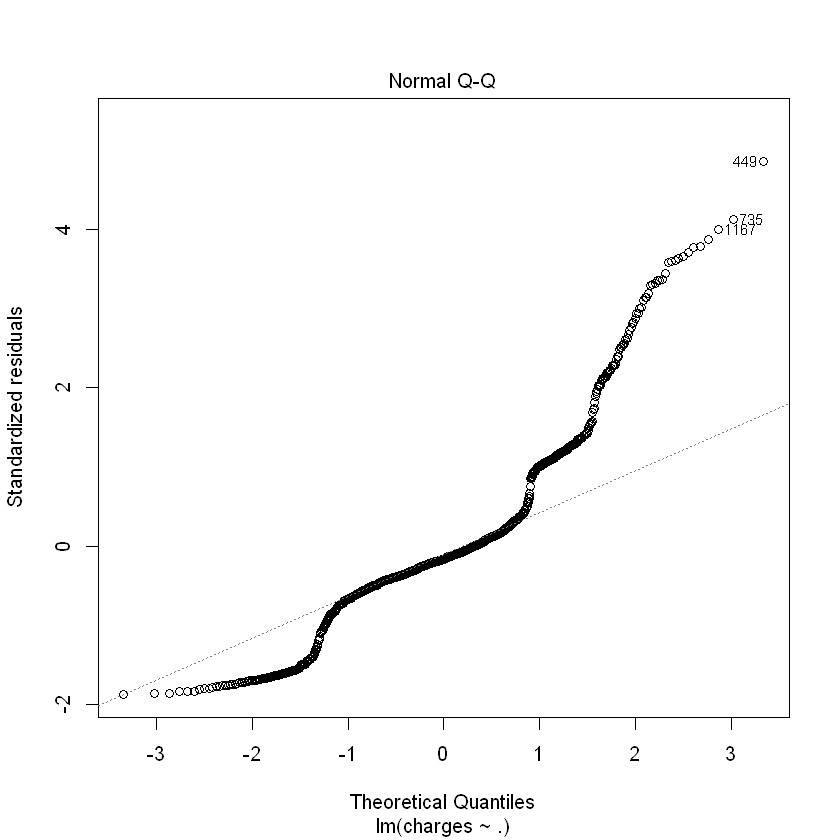

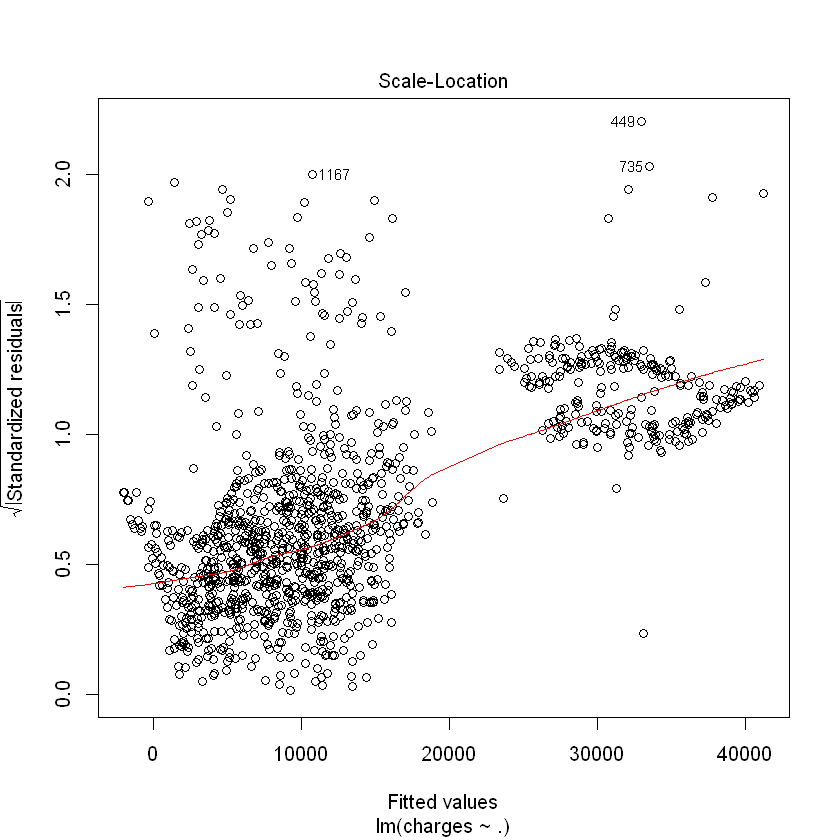

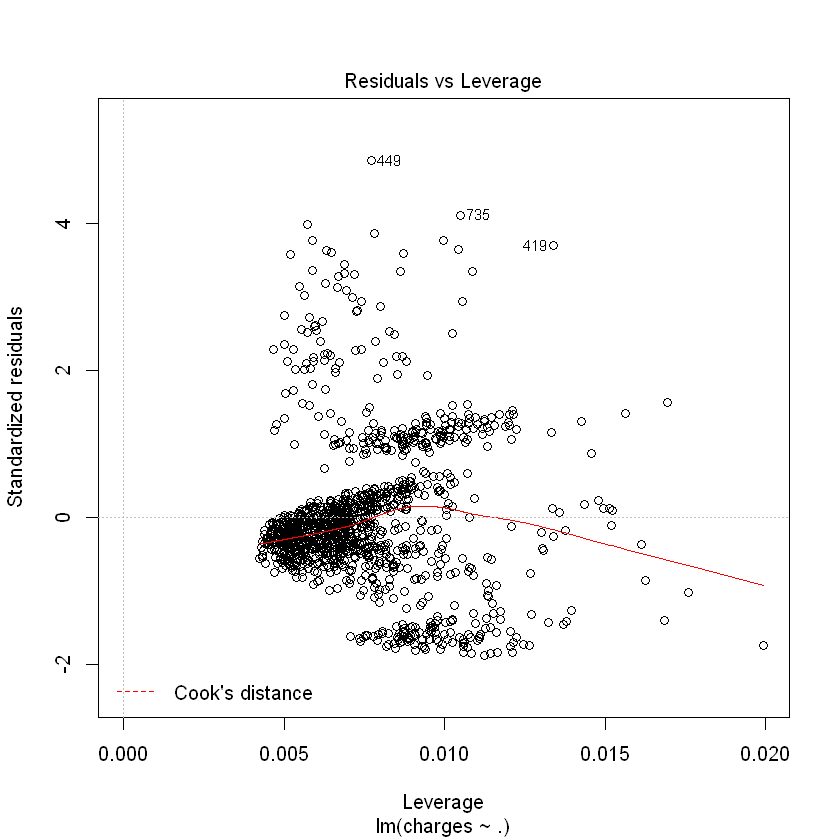

In [142]:
plot(lr_model)

In [144]:
RMSE(result$pred, result$charges)

[1] 5548.974

In [145]:
R2(result$pred, result$charges)

[1] 0.774832

In [146]:
MAE(result$pred, result$charges)

[1] 3897.4